<a href="https://colab.research.google.com/github/shirohigexe/practicas_HO_ML/blob/main/Practica_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Descarga de datos los datos
se descargan los datos, en este caso de mi drive


In [29]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rehanliaqat17/houses-prices-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'houses-prices-dataset' dataset.
Path to dataset files: /kaggle/input/houses-prices-dataset


In [31]:
os.listdir(path)

['output.csv', 'data.csv', 'data.dat']

In [36]:
import pandas as pd
import os

print(os.listdir(path)) #linea para ver el directorio a importar

data_file = pd.read_csv(os.path.join(path, 'data.csv'))
data_file.head()

['output.csv', 'data.csv', 'data.dat']


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [37]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [38]:
data_file = data_file.drop(['street','city','statezip','country'], axis=1)
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 503.3+ KB


vemos algunos de los valores tomados en los atributos con valores object

In [39]:
data_file['view'].value_counts()

,count
view,
0,4140
2,205
3,116
4,70
1,69


In [40]:
data_file['date'].value_counts()

,count
date,
2014-06-23 00:00:00,142
2014-06-25 00:00:00,131
2014-06-26 00:00:00,131
2014-07-08 00:00:00,127
2014-07-09 00:00:00,121
...,...
2014-06-07 00:00:00,4
2014-07-06 00:00:00,3
2014-05-11 00:00:00,2


In [41]:
data_file.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


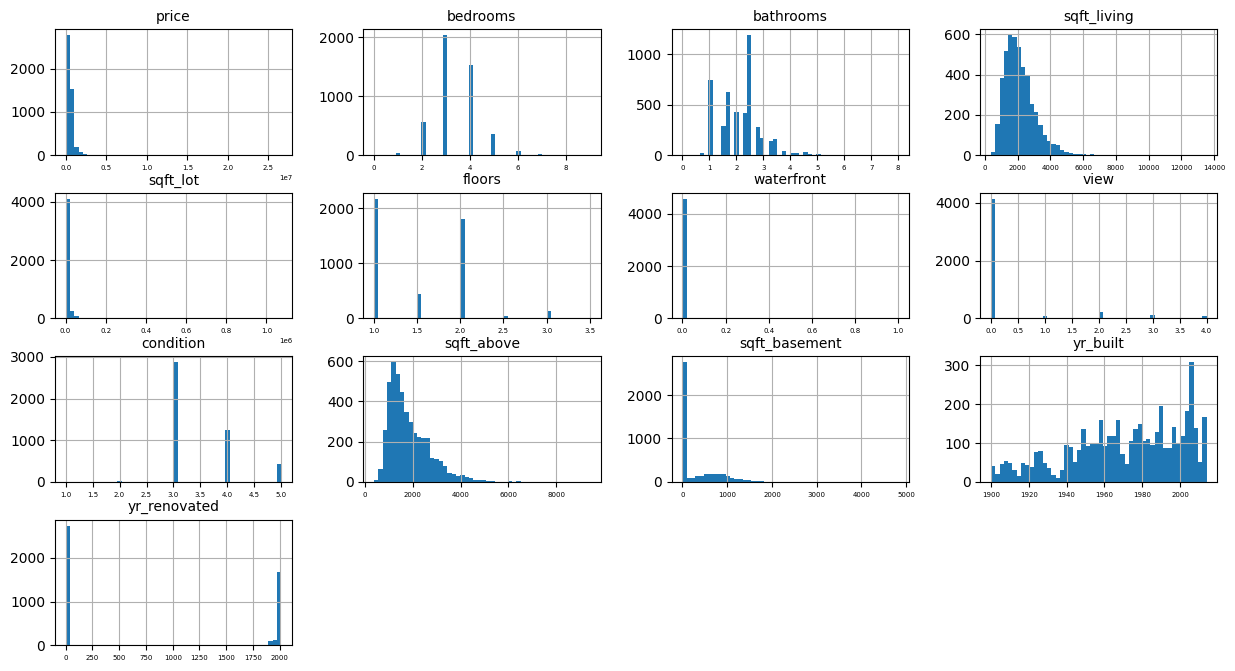

In [42]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=10)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=10)

data_file.hist(bins=50, figsize=(15, 8))

plt.show()

## Creacion de conjunto de prueba
Con este conjunto, el objetivo es evitar el data snooping.
Se hara de manera manual como ejercicio practico.

In [43]:
import numpy as np

def baraja_y_divide(data, test_ratio, rng):
  shuffled_indices = rng.permutation(len(data))
  test_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_size]
  train_indices = shuffled_indices[test_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [44]:
rng = np.random.default_rng(seed=42)
train_set, test_set = baraja_y_divide(data_file, 0.2, rng)
len(train_set)
train_set.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
3958,2014-07-03 00:00:00,1025000.0,4.0,3.50,4370,10860,2.0,0,0,3,4370,0,2008,0
3907,2014-07-03 00:00:00,240000.0,3.0,1.75,1570,8750,1.0,0,0,3,1570,0,1960,2012
1451,2014-05-28 00:00:00,245100.0,3.0,1.75,1300,7958,1.0,0,0,3,1300,0,1996,0
1397,2014-05-27 00:00:00,274950.0,3.0,1.75,1670,7415,1.0,0,0,3,1320,350,1987,2000
1065,2014-05-21 00:00:00,475000.0,4.0,2.00,1790,2250,1.0,0,2,4,840,950,1909,1989


In [45]:
len(test_set)
test_set.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
2502,2014-06-13 00:00:00,530100.0,3.0,1.0,1540,3399,1.5,0,0,3,1200,340,1926,2003
2349,2014-06-11 00:00:00,547500.0,3.0,3.5,1650,2262,3.0,0,0,3,1650,0,2010,0
512,2014-05-12 00:00:00,339000.0,3.0,1.0,1080,8100,1.0,0,0,4,1080,0,1955,2009
2238,2014-06-10 00:00:00,710000.0,3.0,3.5,2440,3427,2.0,0,0,3,1990,450,2000,0
2351,2014-06-11 00:00:00,516000.0,4.0,3.5,2550,8698,2.0,0,0,3,2550,0,2007,0


Ahora veremos el metodo más común usando Scikit-Learn, dado que la cantidad de datos no es tan grande, se omitira el uso de esta herramienta

In [46]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_file, test_size=0.2, random_state=42)
len(train_set)
train_set.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
1898,2014-06-04 00:00:00,685000.0,4.0,2.50,2770,45514,2.0,0,0,4,2770,0,1989,0
1370,2014-05-27 00:00:00,857000.0,4.0,3.00,3720,29043,2.0,0,0,3,3720,0,1991,0
3038,2014-06-23 00:00:00,675000.0,4.0,2.50,2810,11120,2.0,0,0,3,2810,0,1982,0
2361,2014-06-12 00:00:00,1485000.0,4.0,3.75,4030,10800,2.0,0,0,3,4030,0,2006,0
156,2014-05-06 00:00:00,561000.0,3.0,2.00,2000,7000,2.0,0,0,3,2000,0,1916,1986


## Estratificacion
continuaremos haciendo un stratified sampling en 'ApartBenchmark' y 'THouseBenchmark' para tener una muestra representativa de cada grupo de datos

In [57]:
data_file['sqft_living_stratified'] = pd.cut(data_file['sqft_living'],
                                                bins=[300,1600,3000,4000,np.inf],
                                                labels=[1,2,3,4])

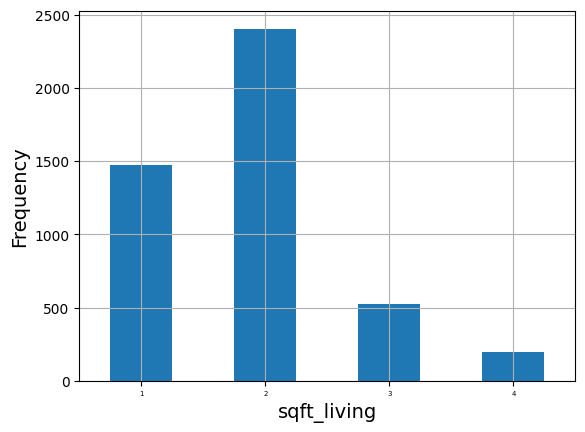

In [58]:
apartments_stratified = data_file['sqft_living_stratified'].value_counts().sort_index()
apartments_stratified.plot.bar(rot=0, grid=True)
plt.xlabel('sqft_living')
plt.ylabel('Frequency')
plt.show()

In [59]:
data_file['sqft_lot_stratified'] = pd.cut(data_file['sqft_lot'],
                                                bins=[600,1000,2000,3000,1000000,np.inf],
                                                 labels=[1,2,3,4,5])


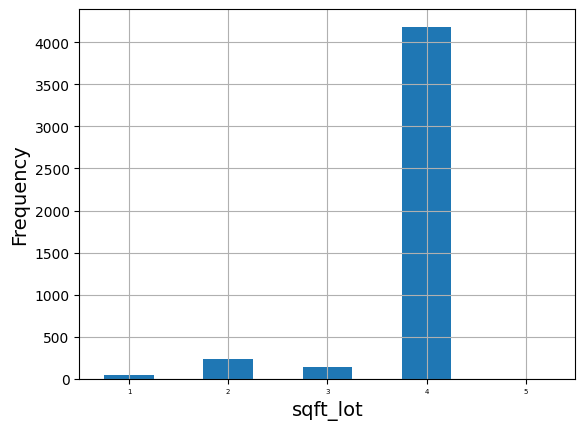

In [60]:
hauses_stratified = data_file['sqft_lot_stratified'].value_counts().sort_index()
hauses_stratified.plot.bar(rot=0, grid=True)
plt.xlabel('sqft_lot')
plt.ylabel('Frequency')
plt.show()

In [62]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(data_file,
                                              data_file["sqft_living_stratified"]):
    strat_train_set_n = data_file.iloc[train_index]
    strat_test_set_n = data_file.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [64]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
    data_file, test_size=0.2, stratify=data_file['sqft_living_stratified'], random_state=42)

## visualizacion de datos oara ganar perspectiva

In [65]:
#se hara una copia para seguridad
housing = strat_train_set.copy()
housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living_stratified,sqft_lot_stratified
4268,2014-07-09 00:00:00,741500.000,2.0,2.50,2150,5760,1.0,0,0,3,2150,0,2010,0,2,4
412,2014-05-09 00:00:00,323000.000,4.0,2.75,1970,7213,1.0,0,0,3,1170,800,1977,2004,2,4
4406,2014-05-20 00:00:00,317061.875,3.0,1.75,1280,10716,1.0,0,0,4,1280,0,1969,0,1,4
4081,2014-07-08 00:00:00,560000.000,4.0,2.25,1950,9800,1.0,0,0,3,1330,620,1968,1997,2,4
1423,2014-05-28 00:00:00,215000.000,2.0,1.00,1320,8865,1.0,0,0,4,1320,0,1943,0,1,4


dado que no se poseen coordenadas para una visualizacion en el 'mapa'no se hace uso de la misma, sin embargo, se deja una opcion usada en el libro, 'hands on ML'

In [66]:
'''housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)

plt.show()'''

'housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)\n\nplt.show()'

veamos correlaciones

In [67]:
corr_matrox = housing.corr(numeric_only=True)
corr_matrox["price"].sort_values(ascending=False)

,price
price,1.000000
sqft_living,0.681713
sqft_above,0.591314
bathrooms,0.506539
view,0.346814
bedrooms,0.327479
sqft_basement,0.316516
floors,0.261946
waterfront,0.161362
sqft_lot,0.078511


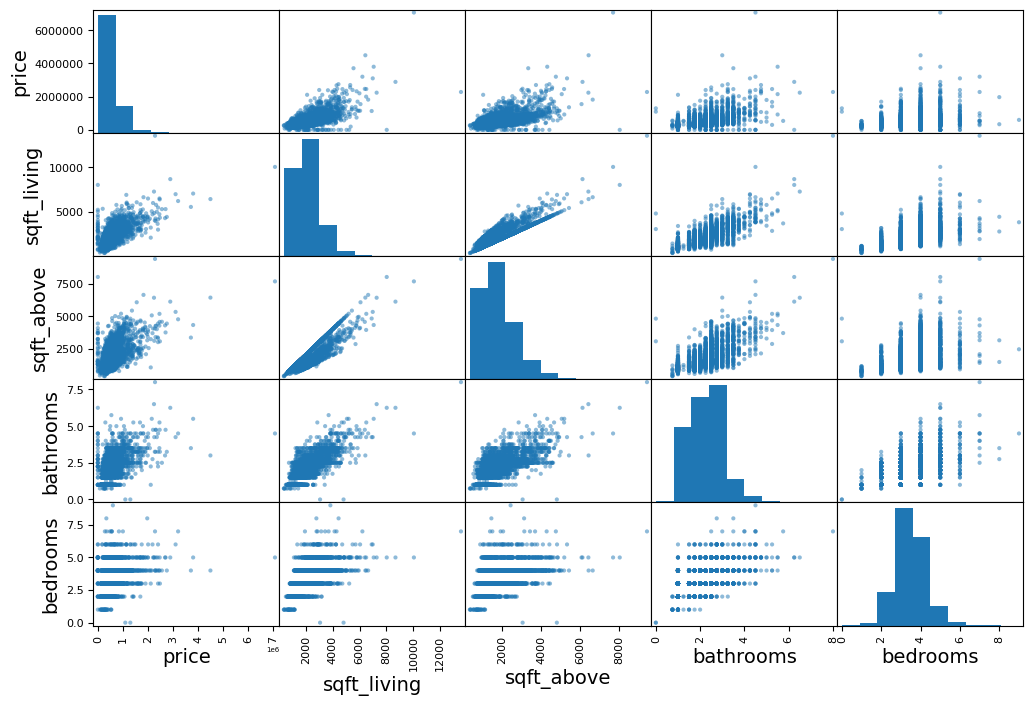

In [68]:
from pandas.plotting import scatter_matrix

attributes = ["price", "sqft_living", "sqft_above",
              "bathrooms",'bedrooms']
scatter_matrix(housing[attributes], figsize=(12, 8))

plt.show()

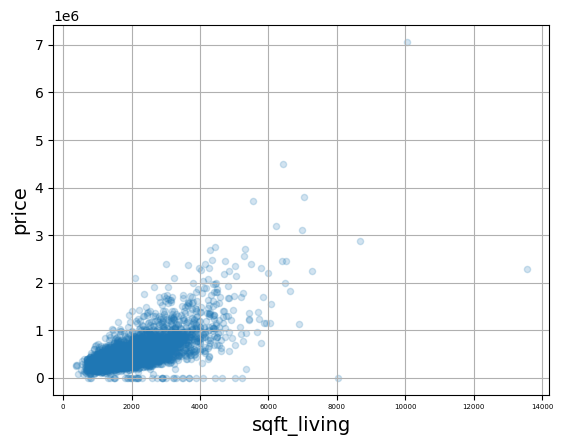

In [69]:
housing.plot(kind="scatter", x="sqft_living", y="price", grid=True, alpha=0.2)

plt.show()

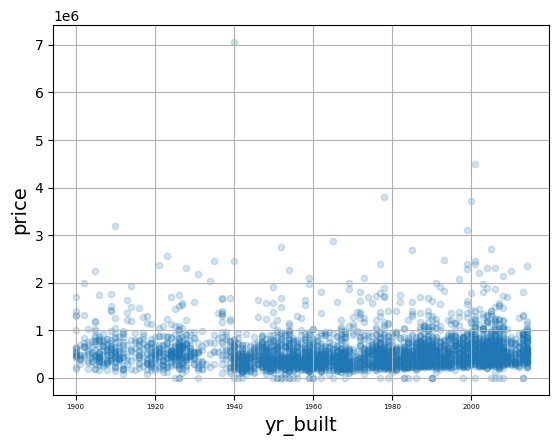

In [70]:
housing.plot(kind="scatter", x="yr_built", y="price", grid=True, alpha=0.2)

plt.show()

#Preparacion para algoritmos ML


In [71]:
housing = strat_train_set.drop('price', axis=1)
housing_labels = strat_train_set['price'].copy()

In [72]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3680 entries, 4268 to 617
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   date                    3680 non-null   object  
 1   bedrooms                3680 non-null   float64 
 2   bathrooms               3680 non-null   float64 
 3   sqft_living             3680 non-null   int64   
 4   sqft_lot                3680 non-null   int64   
 5   floors                  3680 non-null   float64 
 6   waterfront              3680 non-null   int64   
 7   view                    3680 non-null   int64   
 8   condition               3680 non-null   int64   
 9   sqft_above              3680 non-null   int64   
 10  sqft_basement           3680 non-null   int64   
 11  yr_built                3680 non-null   int64   
 12  yr_renovated            3680 non-null   int64   
 13  sqft_living_stratified  3680 non-null   category
 14  sqft_lot_stratified     368

dado que los datos en esta ocacion no tienen NAN, no hace falta una limpieza profunda